This notebook is for scraping historical El Clasicos statistics

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from src.korotkova.main_data import show_table_data

In [65]:
# URL for table with all El Clasicos main info: "Competition", "Matchday", "Date", "Home team", "Away team”, "Result"
url = 'https://www.transfermarkt.com/vergleich/vereineBegegnungen/statistik/131_418'

headers = {
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Fetch HTML content from the URL
response = requests.get(url, headers=headers)
html = response.text

# Parse HTML
soup = BeautifulSoup(html, 'html.parser')
rows = soup.select('tbody tr')[:-1]

# Extract data from the table
data = []
for row in rows:
    match_id = row.select_one('td:nth-of-type(13)').find('a')['id']
    competition = row.select_one('td:nth-of-type(2)').find('img')['title']
    matchday = row.select_one('td:nth-of-type(3)').text.strip()
    date = row.select_one('td:nth-of-type(4)').text.strip()
    home_team = row.select_one('td:nth-of-type(6)').find('a')['title']
    away_team = row.select_one('td:nth-of-type(9)').find('a')['title']
    result = row.select_one('td:nth-of-type(13)').find('span').text.strip()
    
    match_ended_in = 'Extra time' if 'AET' in result else 'Penalties' if 'on pens' in result else 'Main time'
    clean_result = result.split(' ')[0]
    home_away_results = clean_result.split(':')
    home_score = home_away_results[0]
    away_score = home_away_results[1]
    winner = home_team if home_score > away_score else away_team if home_score < away_score else 'Draw'

    data.append([match_id, competition, matchday, date, home_team, away_team, match_ended_in, home_score, away_score, winner])

# Store data only for matches up to the match analysed here (28 October 2023)
data = data[-254:]

# Store collected data in Pandas Dataframe
df = pd.DataFrame(data=data, columns=['match_id', 'competition', 'matchday', 'date', 'home_team', 'away_team', 'match_ended_in', 'home_score', 'away_score', 'winner'])
df['date'] = pd.to_datetime(df['date'], format='%a, %b %d, %Y').dt.strftime('%Y-%m-%d')
df['winner'] = df['winner'].replace({'CF Barcelona': 'FC Barcelona', 'Madrid CF': 'Real Madrid'})

# Save data in .csv file format
df.to_csv('./data/transfermarkt/general_info.csv', index=False)

In [8]:
df = pd.read_csv('./data/transfermarkt/general_info.csv')

In [69]:
print(f'Throughout history, {len(df)} El Clasico have been played')

Throughout history, 254 El Clasico have been played


Real Madrid won 103 times, FC Barcelona 100 times and there were 51 draws


<AxesSubplot:>

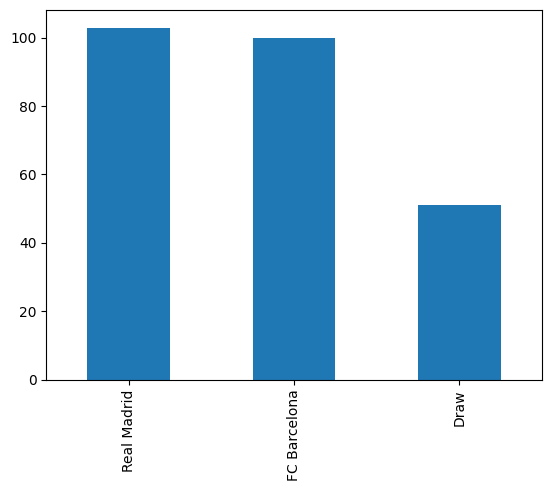

In [79]:
results_history = df['winner'].value_counts()
print(f"Real Madrid won {results_history['Real Madrid']} times, FC Barcelona {results_history['FC Barcelona']} times and there were {results_history['Draw']} draws")
results_history.plot(kind='bar', stacked=True)

Particularly in LaLiga Real Madrid won 77 times, FC Barcelona 74 times and there were 35 draws


<AxesSubplot:>

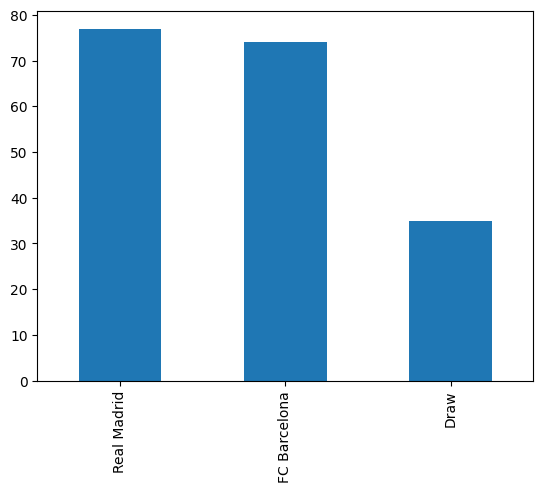

In [80]:
results_history_laliga = df[df.competition == 'LaLiga']['winner'].value_counts()
print(f"Particularly in LaLiga Real Madrid won {results_history_laliga['Real Madrid']} times, FC Barcelona {results_history_laliga['FC Barcelona']} times and there were {results_history_laliga['Draw']} draws")
results_history_laliga.plot(kind='bar', stacked=True)

In [83]:
last_10 = df[:10]['winner'].value_counts()
print(f"In the last 10 matches Real Madrid won {last_10['Real Madrid']} times and lost {last_10['FC Barcelona']} times")

In the last 10 matches Real Madrid won 6 times and lost 4 times


In [ ]:
df_for_visualization = df[['competition', 'date', 'home_team', 'away_team', 'home_score', 'away_score']]
df_for_visualization['result'] = df_for_visualization['home_score'].astype(str) + ":" + df_for_visualization['away_score'].astype(str)
df_for_visualization.drop(columns=['home_score', 'away_score'], inplace=True)
df_for_visualization = df_for_visualization[['competition', 'date', 'home_team', 'result', 'away_team']]

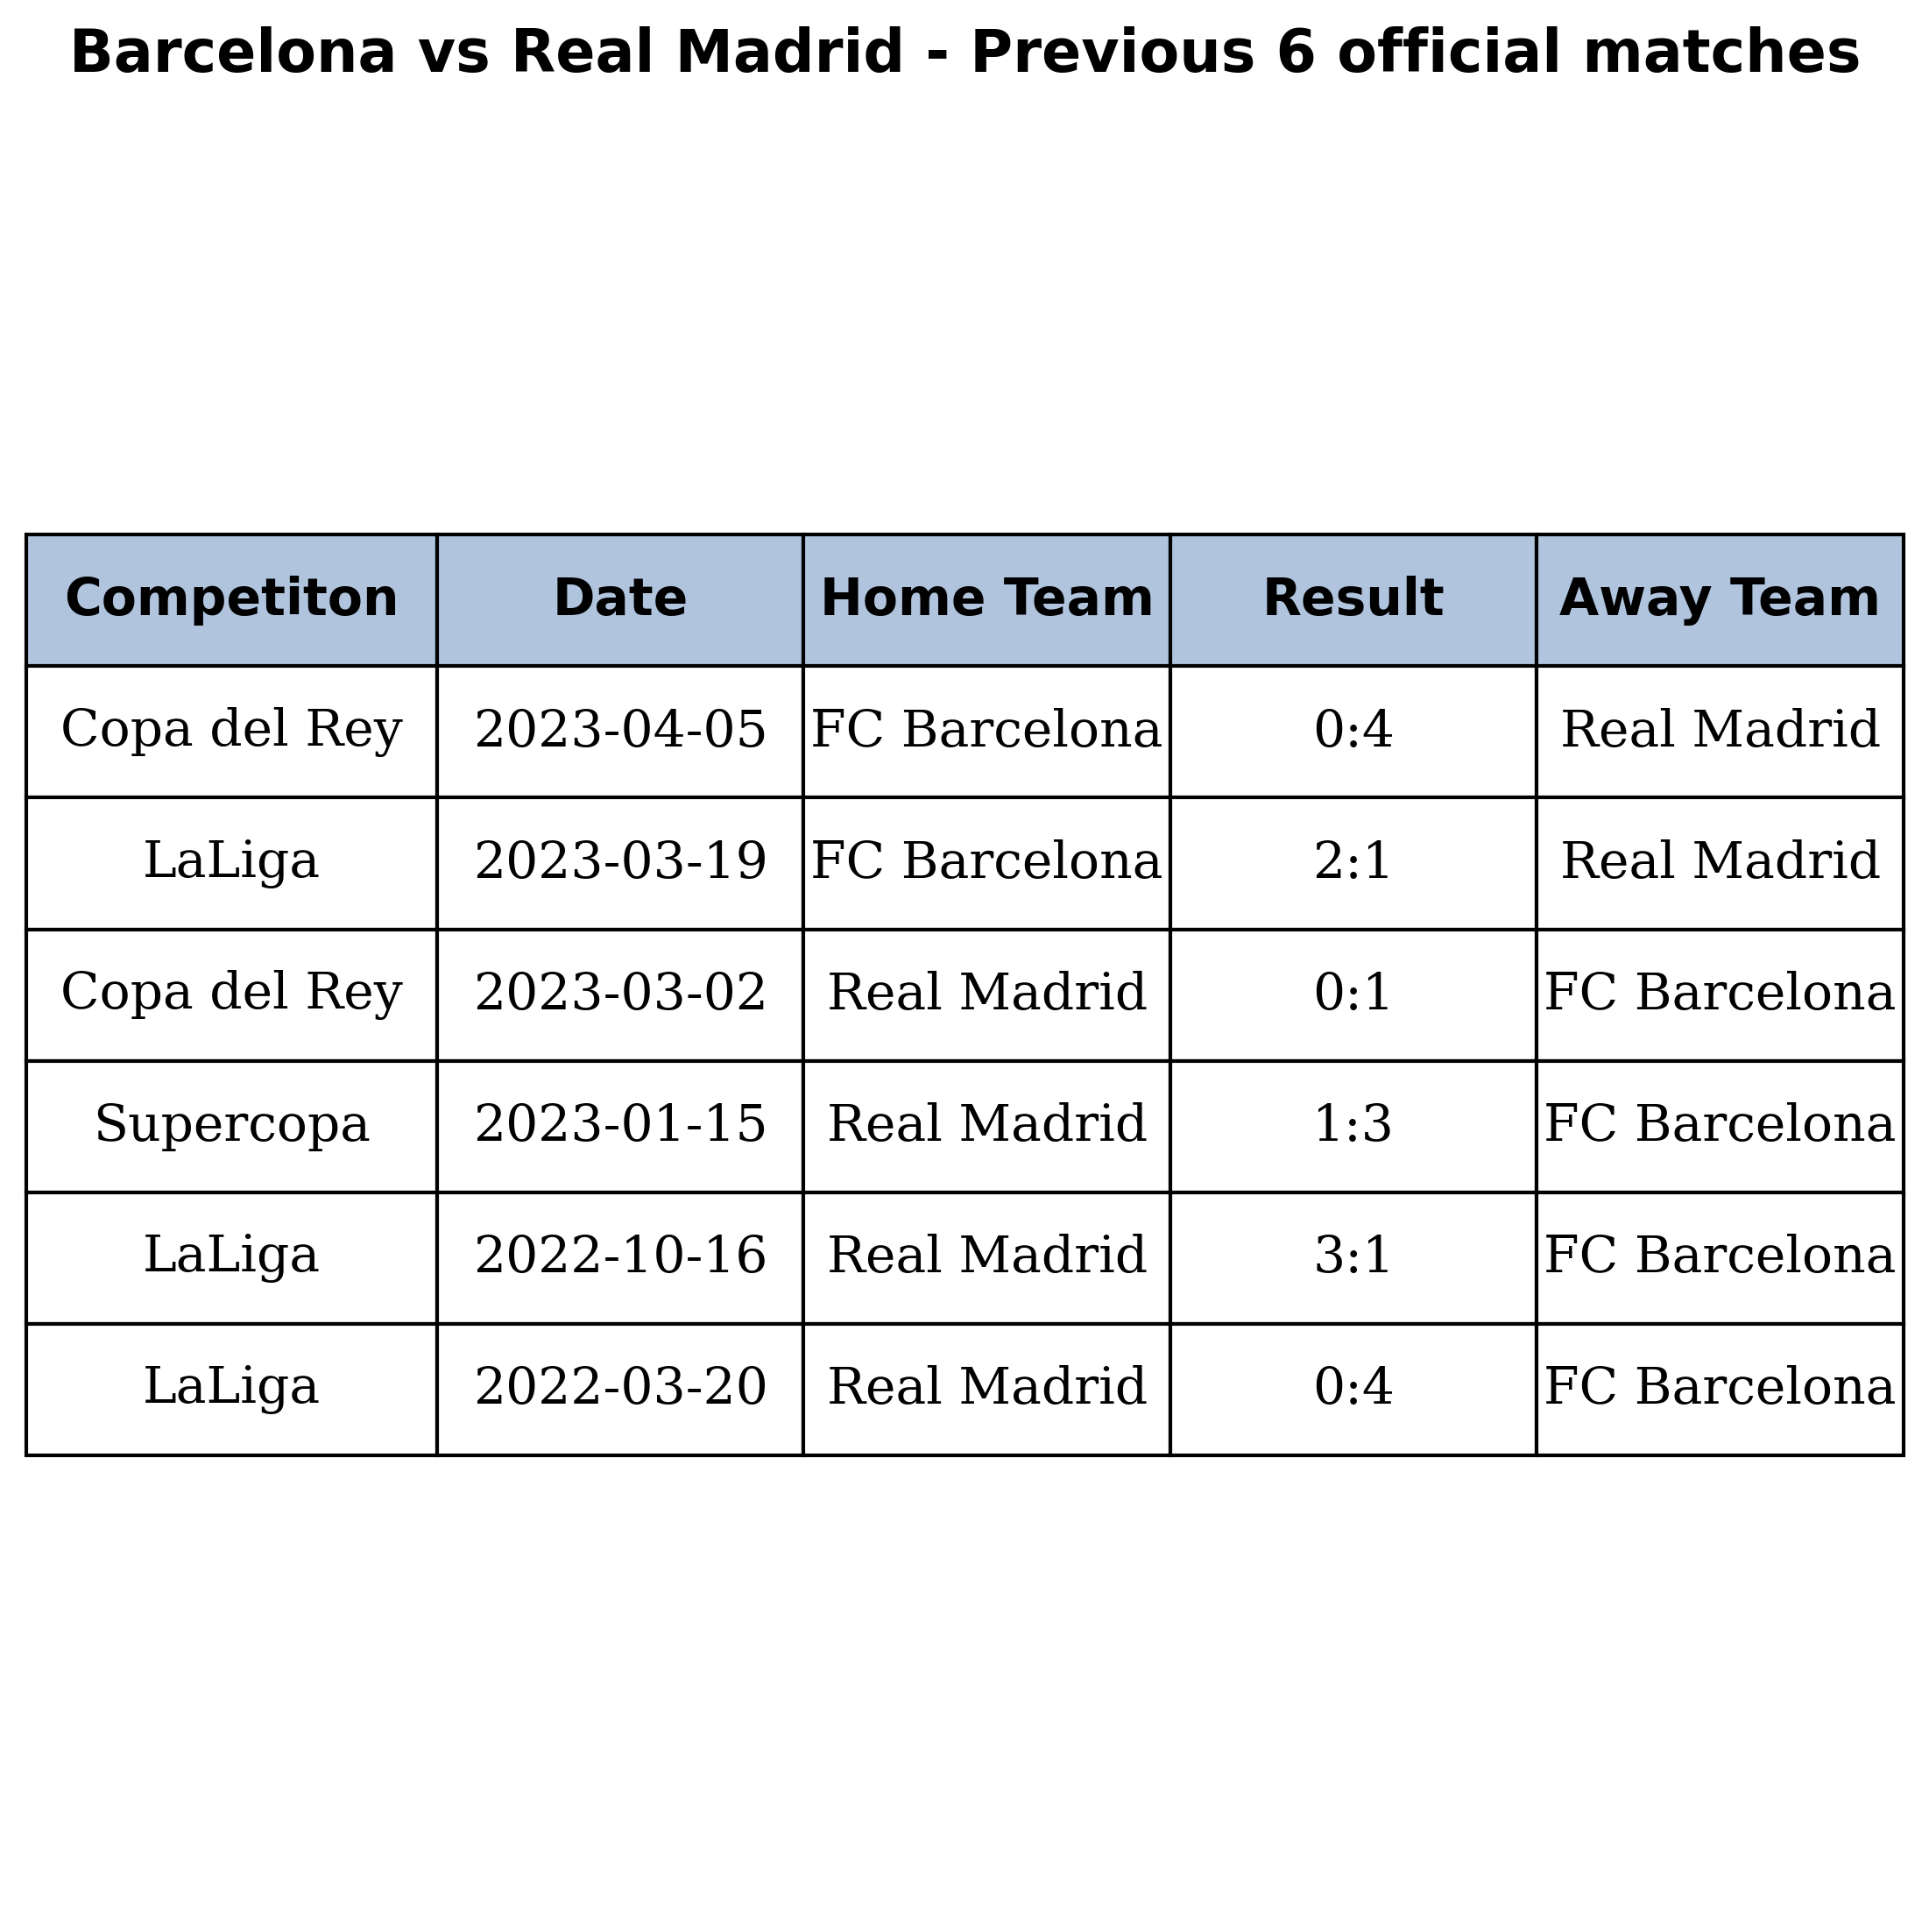

In [39]:
columns = ['Competiton', 'Date', 'Home Team', 'Result', 'Away Team']

show_table_data(columns=columns, table_data=df_for_visualization.values.tolist()[:6], scaleX=3, scaleY=3, fig_size=(6, 9), title='Previous 6 official matches', pad=0)

Tyrone Mings package (TBD)

In [9]:
import tyrone_mings as tm

In [ ]:
match_url = 'https://www.transfermarkt.com/spielbericht/index/spielbericht/4113124'

# response = requests.get(match_url, headers=headers)
# soup = BeautifulSoup(response.content, "html.parser")
final_output_dict = tm.match_pull(match_url=match_url)